Solving 8-Queens puzzle...
Found 92 solutions in 0.03 seconds

Displaying first solution:


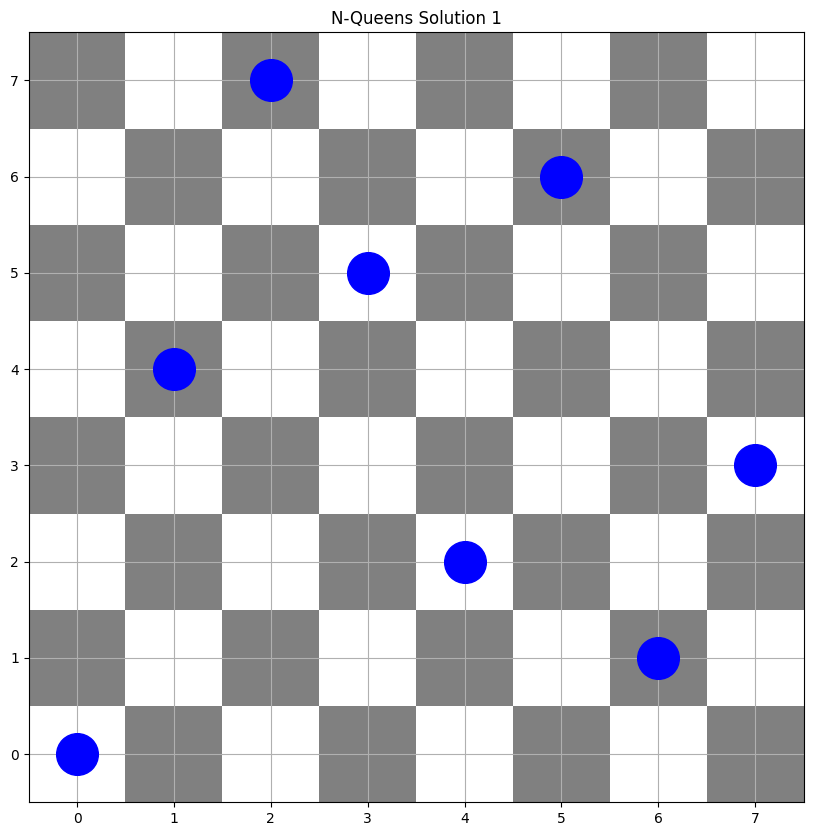


Creating animation of solving process...


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import time

class NQueensSolver:
    def __init__(self, n):
        self.n = n
        self.board = np.zeros((n, n))
        self.solutions = []
        self.steps = []  # Store steps for visualization
        
    def is_safe(self, row, col):
        """Check if a queen can be placed on board[row][col]"""
        
        # Check row on left side
        for j in range(col):
            if self.board[row][j] == 1:
                return False
                
        # Check upper diagonal on left side
        for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
            if self.board[i][j] == 1:
                return False
                
        # Check lower diagonal on left side
        for i, j in zip(range(row, self.n, 1), range(col, -1, -1)):
            if self.board[i][j] == 1:
                return False
                
        return True
        
    def solve_n_queens(self, col=0):
        """Solve N Queens problem using backtracking"""
        # Base case: If all queens are placed, return True
        if col >= self.n:
            solution = self.board.copy()
            self.solutions.append(solution)
            return True
            
        # Consider this column and try placing this queen in all rows one by one
        for row in range(self.n):
            # Check if queen can be placed on board[row][col]
            if self.is_safe(row, col):
                # Place this queen in board[row][col]
                self.board[row][col] = 1
                # Store the current state for visualization
                self.steps.append(('try', row, col, self.board.copy()))
                
                # Recur to place rest of the queens
                self.solve_n_queens(col + 1)
                
                # If placing queen in board[row][col] doesn't lead to a solution,
                # then remove queen from board[row][col]
                self.board[row][col] = 0
                # Store backtracking step
                self.steps.append(('backtrack', row, col, self.board.copy()))
                
        return False
    
    def visualize_solution(self, solution_idx=0):
        """Visualize a specific solution"""
        if not self.solutions:
            print("No solutions found!")
            return
            
        solution = self.solutions[solution_idx]
        self._create_board_visualization(solution, f"N-Queens Solution {solution_idx + 1}")
        
    def visualize_steps(self):
        """Create an animation of the solving process"""
        fig, ax = plt.subplots(figsize=(10, 10))
        plt.close()  # Prevent display of empty figure
        
        # Initialize the board
        board_display = ax.imshow(np.zeros((self.n, self.n)), 
                                cmap='binary', interpolation='nearest')
        
        def update(frame):
            action, row, col, board = self.steps[frame]
            ax.clear()
            
            # Draw the chessboard
            for i in range(self.n):
                for j in range(self.n):
                    color = 'white' if (i + j) % 2 == 0 else 'gray'
                    ax.add_patch(Rectangle((j - 0.5, i - 0.5), 1, 1, 
                                        facecolor=color))
                    
            # Draw the queens
            for i in range(self.n):
                for j in range(self.n):
                    if board[i][j] == 1:
                        if i == row and j == col:
                            color = 'green' if action == 'try' else 'red'
                        else:
                            color = 'blue'
                        ax.plot(j, i, 'o', markersize=30, color=color)
                        
            ax.set_title(f"Step {frame + 1}: {action.title()} placing queen at row {row + 1}, col {col + 1}")
            ax.grid(True)
            ax.set_xticks(range(self.n))
            ax.set_yticks(range(self.n))
            ax.set_xlim(-0.5, self.n - 0.5)
            ax.set_ylim(-0.5, self.n - 0.5)
            
        # Create animation
        anim = animation.FuncAnimation(fig, update, frames=len(self.steps),
                                     interval=500, repeat=False)
        
        return anim
    
    def _create_board_visualization(self, board, title):
        """Helper method to create a static board visualization"""
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Draw the chessboard
        for i in range(self.n):
            for j in range(self.n):
                color = 'white' if (i + j) % 2 == 0 else 'gray'
                ax.add_patch(Rectangle((j - 0.5, i - 0.5), 1, 1, 
                                    facecolor=color))
                
        # Draw the queens
        for i in range(self.n):
            for j in range(self.n):
                if board[i][j] == 1:
                    ax.plot(j, i, 'o', markersize=30, color='blue')
                    
        ax.set_title(title)
        ax.grid(True)
        ax.set_xticks(range(self.n))
        ax.set_yticks(range(self.n))
        ax.set_xlim(-0.5, self.n - 0.5)
        ax.set_ylim(-0.5, self.n - 0.5)
        plt.show()

def main():
    # Create solver for 8 queens
    n = 8
    solver = NQueensSolver(n)
    
    # Solve the problem
    print(f"Solving {n}-Queens puzzle...")
    start_time = time.time()
    solver.solve_n_queens()
    end_time = time.time()
    
    print(f"Found {len(solver.solutions)} solutions in {end_time - start_time:.2f} seconds")
    
    # Visualize first solution
    print("\nDisplaying first solution:")
    solver.visualize_solution(0)
    
    # Create and display animation of solving process
    print("\nCreating animation of solving process...")
    anim = solver.visualize_steps()
    plt.show()

if __name__ == "__main__":
    main()